In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#Importing dataset from CIFAR
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split


# Load CIFAR-10 dataset
(x_train, y_train), (x_holdout, y_holdout) = cifar10.load_data()

In [12]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(y_train.shape[0], "train labels")
print(x_holdout.shape[0], "test samples")
print(y_holdout.shape[0], "test labels")

x_train shape: (50000, 32, 32, 3)
50000 train samples
50000 train labels
10000 test samples
10000 test labels


In [10]:
#Holding out data for test validation, ensuring a consistent split across classes with stratify
# We are getting 50% of the holdout data (test_size=0.50), which was already 20% of the entire dataset.

x_test, x_val, y_test, y_val = train_test_split(
    x_holdout, y_holdout, test_size=0.50, stratify=y_holdout, random_state=42
)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
5000 validation samples
5000 test samples


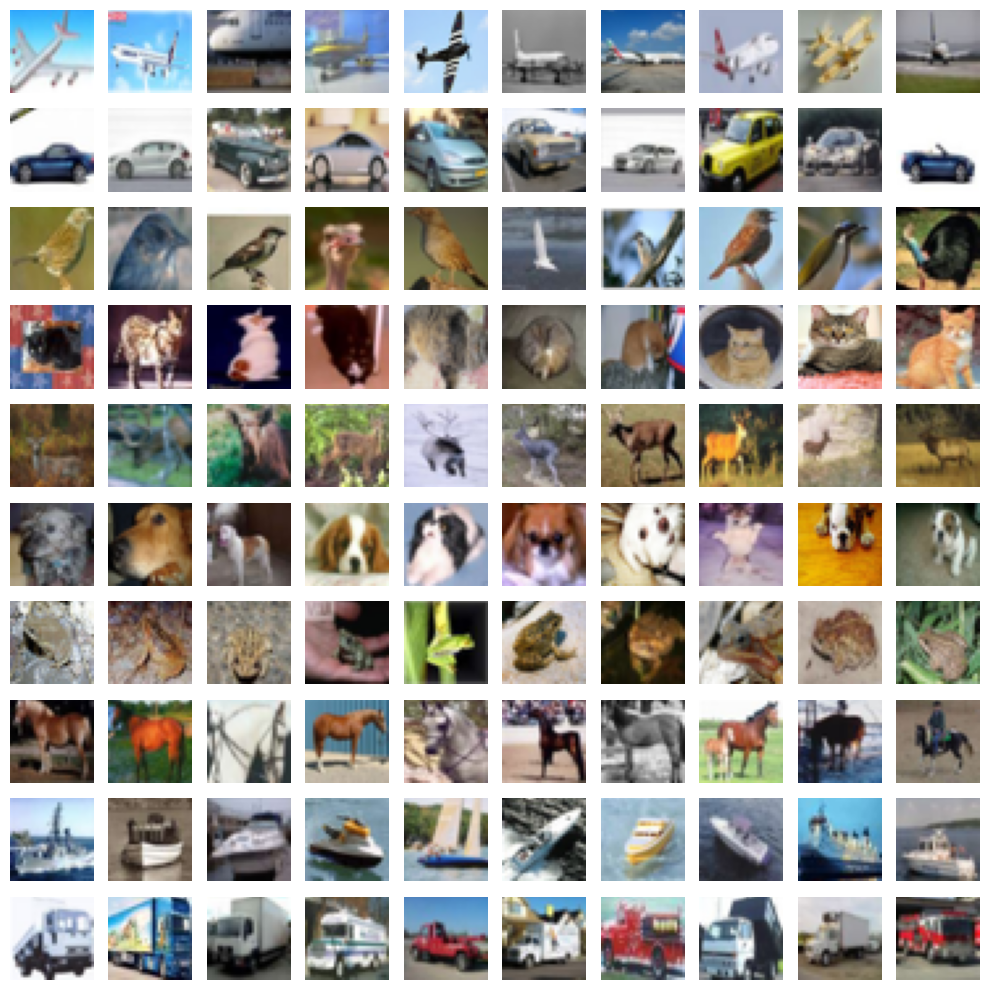

In [15]:
#Visualize: 10×10 grid, 10 random samples per class to make sure we have all classes represented
import matplotlib.pyplot as plt

class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]
y_val_f = y_val.flatten()
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for cls in range(10):
    idxs = np.where(y_val_f == cls)[0]
    sel = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(sel):
        ax = axes[cls, j]
        ax.imshow(x_val[idx])
        ax.axis("off")
plt.tight_layout()
plt.show()

In [16]:
"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

In [18]:
# convert classes into categories
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)
y_val_cat = to_categorical(y_val, num_classes)

In [20]:
"""
## Build the model
"""

model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,146 (402.91 KB)

 Trainable params: 103,146 (402.91 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
"""
## Train the model
"""

batch_size = 128
epochs = 15

model1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

model1.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)



Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.1947 - loss: 2.1165 - val_accuracy: 0.3740 - val_loss: 1.6877
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3562 - loss: 1.7247 - val_accuracy: 0.4812 - val_loss: 1.4187
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4403 - loss: 1.5370 - val_accuracy: 0.5324 - val_loss: 1.3017
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4785 - loss: 1.4357 - val_accuracy: 0.5586 - val_loss: 1.2223
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5126 - loss: 1.3500 - val_accuracy: 0.6008 - val_loss: 1.1375
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5417 - loss: 1.2856 - val_accuracy: 0.6038 - val_loss: 1.1486
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5566 - loss: 1.2495 - val_accuracy: 0.6274 - val_loss: 1.0605
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5742 - loss: 1.1996 - val_accuracy: 

In [22]:
"""
## Evaluate the trained model
"""

score1 = model1.evaluate(x_val, y_val_cat, verbose=0)
print("Test loss:", score1[0])
print("Test accuracy:", score1[1])

Test loss: 0.9232280254364014
Test accuracy: 0.6805999875068665
